# Assignment 2 - Network Connectivity

In this assignment you will go through the process of importing and analyzing an internal email communication network between employees of a mid-sized manufacturing company. 
Each node represents an employee and each directed edge between two nodes represents an individual email. The left node represents the sender and the right node represents the recipient. We will also store the timestamp of each email. 

In [1]:
import networkx as nx

#!head assets/email_network.txt

### Question 1

Using networkx, load up the directed multigraph from `assets/email_network.txt`. Make sure the node names are strings.

*This function should return a directed multigraph networkx graph.*

In [23]:
def answer_one():

    G = nx.read_edgelist(
        'assets/email_network.txt', 
        edgetype=int, 
        data=(('weight', int),), 
        create_using=nx.MultiDiGraph())
    return G
                                                                     
                                                                     

In [26]:
ans_one = answer_one()

### Question 2

How many employees are represented in the network?

How many `sender`->`recipient` pairs of employees are there in the network such that `sender` sent at least one email to `recipient`? Note that even if a `sender` sent multiple messages to a `recipient`, they should only be counted once. You should **not** exclude cases where an employee sent emails to themselves from this [email] count. 

*This function should return a tuple with two integers (#employees, # `sender`->`recipient` pairs).*

In [27]:
len(ans_one.edges())

82927

In [12]:
def answer_two():
    # YOUR CODE HERE
    
    return len(ans_one.nodes()), len(ans_one.edges())

In [13]:
ans_two = answer_two()


### Question 3

* Part 1. Assume that information in this company can only be exchanged through email.

    When an employee sends an email to another employee, a communication channel has been created, allowing the sender to provide information to the reciever, but not viceversa. 

    Based on the emails sent in the data, is it possible for information to go from every employee to every other employee?


* Part 2. Now assume that a communication channel established by an email allows information to be exchanged both ways. 

    Based on the emails sent in the data, is it possible for information to go from every employee to every other employee?


*This function should return a tuple of bools (part1, part2).*

In [30]:
def answer_three():
    # YOUR CODE HERE
    part1 = nx.is_strongly_connected(ans_one)
    part2 = nx.is_connected(ans_one.to_undirected())
    return part1, part2

In [31]:
ans_three = answer_three()


### Question 4

How many nodes are in the largest weakly connected component of the graph?

*This function should return an int.*

In [37]:
G = answer_one()
components = nx.weakly_connected_components(G)
len(max(components, key=len))

126

In [42]:
def answer_four():
    # YOUR CODE HERE
    G = answer_one()
    components = nx.weakly_connected_components(G)
    res = len(max(components, key=len))
    return res

In [43]:
ans_four = answer_four()

### Question 5

How many nodes are in the largest strongly connected component?

*This function should return an int*

In [40]:
def answer_five():
    # YOUR CODE HERE
    G = answer_one()
    components = nx.strongly_connected_components(G)
    res = len(max(components, key=len))
    return res

In [41]:
ans_five = answer_five()


### Question 6

Using the NetworkX functions `strongly_connected_components` and `subgraph`, find the subgraph of nodes in the largest strongly connected component. 
Call this graph G_sc.

*This function should return a networkx MultiDiGraph named G_sc.*

In [46]:
def answer_six():
    # YOUR CODE HERE
    G = answer_one()
    subg = (G.subgraph(c) for c in nx.strongly_connected_components(G))
    G_sc = max(subg, key=len)
    return G_sc

In [47]:
ans_six = answer_six()
assert type(ans_six) == nx.MultiDiGraph , "Your return type should be a MultiDiGraph object"


### Question 7

What is the average distance between nodes in G_sc?

*This function should return a float.*

In [48]:
def answer_seven():
    # YOUR CODE HERE
    G = answer_six()
    avg_dis = nx.average_shortest_path_length(G)
    return avg_dis

In [49]:
ans_seven = answer_seven()


### Question 8

What is the largest possible distance between two employees in G_sc?

*This function should return an int.*

In [50]:
def answer_eight():
    # YOUR CODE HERE
    G = answer_six()
    max_dis = nx.diameter(G)
    return max_dis

In [51]:
ans_eight = answer_eight()


### Question 9

What is the set of nodes in G_sc with eccentricity equal to the diameter?

*This function should return a set of the node(s).*

In [52]:
def answer_nine():
    # YOUR CODE HERE
    G = answer_six()
    return set(nx.periphery(G))

In [53]:
ans_nine = answer_nine()
assert type(ans_nine) == set, "Student answer must return a set"

### Question 10

What is the set of node(s) in G_sc with eccentricity equal to the radius?

*This function should return a set of the node(s).*

In [54]:
def answer_ten():
    # YOUR CODE HERE
    G = answer_six()
    return set(nx.center(G))

In [55]:
ans_ten = answer_ten()
assert type(ans_ten) == set, "Student answer must return a set"

### Question 11

Which node in G_sc has the most shortest paths to other nodes whose distance equal the diameter of G_sc?


For the node with the most such shortest paths, how many of these paths are there?


*This function should return a tuple (name of node, number of paths).*

In [56]:
def answer_eleven():
    # YOUR CODE HERE
    G = answer_six()
    d = nx.diameter(G)
    ps = nx.periphery(G)
    max_count = 0
    result_node = None
    for node in ps:
        count = 0
        sp = nx.shortest_path_length(G, node)
        for key, value in sp.items():
            if value == d:
                count += 1        
        if count > max_count:
            result_node = node
            max_count = count

    return result_node, max_count

In [57]:
ans_eleven = answer_eleven()
assert type(ans_eleven) == tuple, "Student answer must be a tuple"

### Question 12

Suppose you want to prevent communication flow from the node that you found in question 11 to node 10. What is the smallest number of nodes you would need to remove from the graph (you're not allowed to remove the node from the previous question or 10)? 

*This function should return an integer.*

In [58]:
def answer_twelve():
    # YOUR CODE HERE
    G = answer_six()
    center = nx.center(G)[0]
    node = answer_eleven()[0]
    return len(nx.minimum_node_cut(G, center, node))

In [59]:
ans_twelve = answer_twelve()


### Question 13

Convert the graph G_sc into an undirected graph by removing the direction of the edges of G_sc. Call the new graph G_un. 


*This function should return a networkx Graph.*

In [64]:
def answer_thirteen():
    # YOUR CODE HERE
    G = answer_six()
    undirected = G.to_undirected()
    G_un = nx.Graph(undirected)
    return G_un

In [61]:
ans_thirteen = answer_thirteen()
assert type(ans_thirteen) == nx.Graph , "Your return type should be a Graph object"


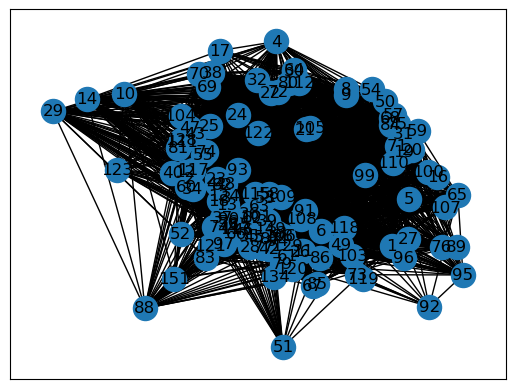

In [63]:
# nx.draw_networkx(ans_thirteen)

### Question 14

What is the transitivity and average clustering coefficient of graph G_un?

*This function should return a tuple (transitivity, avg clustering).*     
*Note: DO NOT round up your answer.*

In [65]:
def answer_fourteen():
    # YOUR CODE HERE
    G = answer_thirteen()
    return nx.transitivity(G), nx.average_clustering(G)

In [66]:
ans_fourteen = answer_fourteen()
assert type(ans_fourteen) == tuple, "Student answer must be a tuple"
